In [13]:
# Loading Libraries and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg


In [14]:
# Load the Airline Passengers dataset

df = pd.read_csv('/content/airline-passengers.csv', header=0, parse_dates=[0], index_col=0)
# Display basic information about the data
print("Dataset Information:")
print(df.head())
print("\n")


Dataset Information:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121




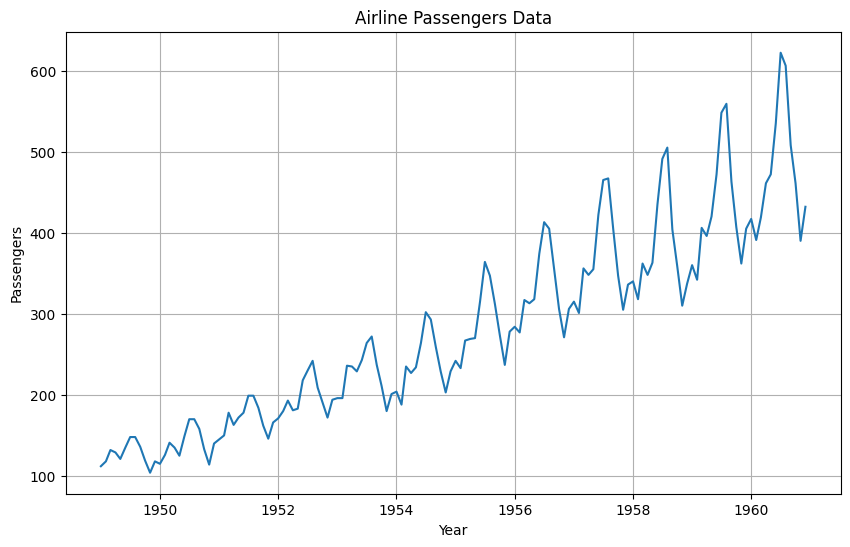

In [3]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Airline Passengers Data')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()


In [4]:
# Function to check for stationarity using ADF test
def check_stationarity(data):
    adftest = adfuller(data['Passengers'], autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('Results of Dickey-Fuller Test:')
    print(adfoutput)
# Apply stationarity check
check_stationarity(df)


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64


In [5]:
# Function to make the data stationary by differencing
def make_stationary(data):
    data_diff = data.diff().dropna()
    check_stationarity(data_diff)
    return data_diff

# Apply differencing to make the data stationary
df_diff = make_stationary(df)


Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
dtype: float64


In [6]:
# Fit an Autoregressive (AR) model with lag 12
model = AutoReg(df_diff['Passengers'], lags=12)
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [7]:
# Print model summary
print(results.summary())


                            AutoReg Model Results                             
Dep. Variable:             Passengers   No. Observations:                  143
Model:                    AutoReg(12)   Log Likelihood                -499.351
Method:               Conditional MLE   S.D. of innovations             10.945
Date:                Thu, 11 Jul 2024   AIC                           1026.701
Time:                        16:37:55   BIC                           1066.954
Sample:                    02-01-1950   HQIC                          1043.058
                         - 12-01-1960                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.4708      2.055      4.121      0.000       4.442      12.499
Passengers.L1     -0.1991      0.066     -3.005      0.003      -0.329      -0.069
Passengers.L2     -0.2809      0.068

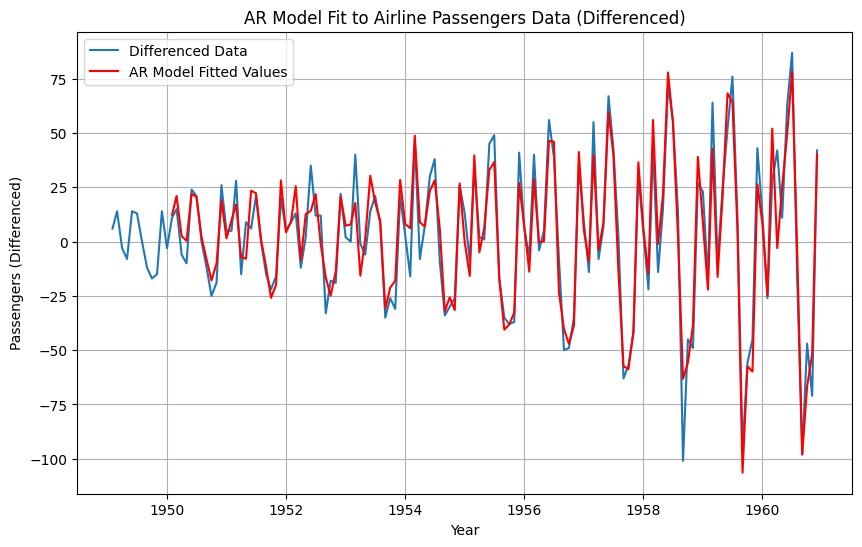

In [11]:

# Plot data and fitted values

plt.figure(figsize=(10, 6))
plt.plot(df_diff['Passengers'], label='Differenced Data')
plt.plot(results.fittedvalues, color='red', label='AR Model Fitted Values')
plt.title('AR Model Fit to Airline Passengers Data (Differenced)')
plt.xlabel('Year')
plt.ylabel('Passengers (Differenced)')
plt.legend()
plt.grid(True)
plt.show()


In [10]:

# Make predictions using the fitted model
forecast = results.predict(start=len(df_diff), end=len(df_diff) + 11)

# Print forecasted values
print("\nForecasted Values for the next 12 periods:")
print(forecast)



Forecasted Values for the next 12 periods:
1961-01-01    13.676288
1961-02-01   -33.170440
1961-03-01    28.245759
1961-04-01    45.987234
1961-05-01    22.077755
1961-06-01    66.985271
1961-07-01    95.644135
1961-08-01   -25.129569
1961-09-01   -96.718769
1961-10-01   -57.320716
1961-11-01   -73.094980
1961-12-01    39.836729
Freq: MS, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


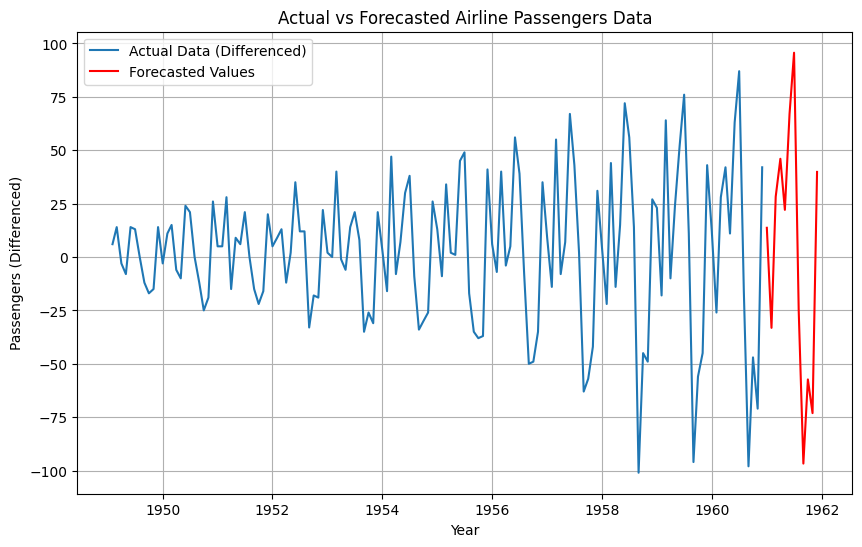

In [12]:
# Plot actual and predicted data
plt.figure(figsize=(10, 6))
plt.plot(df_diff.index, df_diff['Passengers'], label='Actual Data (Differenced)')
plt.plot(forecast.index, forecast, color='red', label='Forecasted Values')
plt.title('Actual vs Forecasted Airline Passengers Data')
plt.xlabel('Year')
plt.ylabel('Passengers (Differenced)')
plt.legend()
plt.grid(True)
plt.show()

